# End to End Cats Vs Dogs Classification Using CNN In Few Steps
This Notebook implements Convolutional Neural Network to classify between the dogs and cats using their labeled images.

### Setting up the tool box:

In [42]:
#for modeling
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
#for preprocessing
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import numpy as np
#for visualizing
import matplotlib.pyplot as plt


## Creating the Modeling Pipeline:

In [43]:
def create_model():
    """
    Creates CNN model's artitechture.
    """
    #creating the artitechure
    model=Sequential([
                     Convolution2D(32, (3, 3), input_shape=( 128, 128, 3), activation="relu"),#first Conv layer
                     MaxPooling2D(pool_size=(2,2)),#pooling layer
                     Convolution2D(64, (3, 3), activation="relu"),#second conv layer
                     MaxPooling2D(pool_size=(2,2)),#pooling for second layer
                     Flatten(),#flattening
                     Dense(units=128,activation="relu"),#hidden layer
                     Dense(units=1,activation="sigmoid")#output layer
    ])
    #compiling the model
    model.compile(
                    loss="binary_crossentropy", 
                     optimizer="adam",
                     metrics=["accuracy"]
                 )
    return model
def train_model(train_data,test_data):
    """
    Create model and fit it on train data and return the model back.
    """
    model=create_model()
    earlyStop=tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                              patience=5) #callback to stop early
    model.fit_generator(train_data,
                       validation_data=test_data,
                       epochs=10,
                       callbacks=[earlyStop]
                       )
    return model

### Creating the Image Preprocessing Pipeline:

In [44]:
def preprocessing(test_data=False,pred_data=False,path=None):
    """
    Taking the type of data into consideration, returns its preprocessed form.
    """
    if test_data:
        test_gen=ImageDataGenerator(rescale=1./255,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
        test_set=test_gen.flow_from_directory("/kaggle/input/dogs-cats-images/dataset/test_set/",
                                       target_size=(128, 128),
                                       batch_size=32,
                                       class_mode='binary')
        return test_set
    elif pred_data:
        from keras.preprocessing import image
        test_img=image.load_img(path,target_size=(128, 128))
        test_img=image.img_to_array(test_img)
        test_img=np.expand_dims(test_img,axis=0)
        return test_img
        
    else:
        
        train_gen=ImageDataGenerator(rescale=1./255,
                                      zoom_range=0.2,
                                      horizontal_flip=True
                                    )
        train_set=train_gen.flow_from_directory("/kaggle/input/dogs-cats-images/dataset/training_set/",
                                                target_size=(128, 128),
                                                batch_size=32,
                                                class_mode='binary')
        return train_set
       

### Preprocessing Train & Test data:

In [17]:
train_data=preprocessing()
test_data=preprocessing(test_data=True)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


### Fitting the model:

In [18]:
model=train_model(train_data,test_data)

Epoch 1/10
250/250 [==============================] - 105s 421ms/step - loss: 0.6912 - accuracy: 0.5913 - val_loss: 0.7126 - val_accuracy: 0.6375
Epoch 2/10
250/250 [==============================] - 98s 392ms/step - loss: 0.6027 - accuracy: 0.6716 - val_loss: 0.5949 - val_accuracy: 0.6925
Epoch 3/10
250/250 [==============================] - 96s 386ms/step - loss: 0.5706 - accuracy: 0.7021 - val_loss: 0.4598 - val_accuracy: 0.7160
Epoch 4/10
250/250 [==============================] - 96s 384ms/step - loss: 0.5413 - accuracy: 0.7271 - val_loss: 0.3115 - val_accuracy: 0.7465
Epoch 5/10
250/250 [==============================] - 94s 378ms/step - loss: 0.5133 - accuracy: 0.7390 - val_loss: 0.4290 - val_accuracy: 0.7475
Epoch 6/10
250/250 [==============================] - 95s 378ms/step - loss: 0.4805 - accuracy: 0.7654 - val_loss: 0.8045 - val_accuracy: 0.7560
Epoch 7/10
250/250 [==============================] - 101s 402ms/step - loss: 0.4679 - accuracy: 0.7797 - val_loss: 0.6226 - val_

### Preprocessing data for predictions & making predictions on it.

In [68]:
def show_preds(path,model=model):
    image=preprocessing(path=path,pred_data=True)
    pred_view=tf.keras.preprocessing.image.load_img(path,target_size=(224,224))
    predictions=model.predict(image)
    if predictions[0][0]==1:
        predictions="This Image Contains a dog."
    else:
        predictions="This Image Contains a cat."
    plt.imshow(pred_view)
    plt.title(predictions,color="Green")
    plt.xticks([]);
    plt.yticks([]);

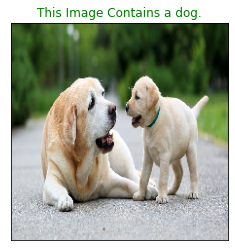

In [74]:
show_preds("/kaggle/input/for-testing/d1.jpg") #only give paths and make predictions

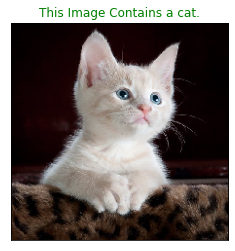

In [71]:
show_preds("/kaggle/input/for-testing/c2.jpeg")

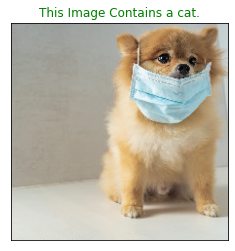

In [73]:
show_preds("/kaggle/input/for-testing/d2.jpg")

 🤔 Model got confused here..........
 Infact I was also confused when I saw that dog first time haha , so it's cool that our model is still at 76 % but we can improve it by:
 1. Using a larger dataset from here https://www.kaggle.com/biaiscience/dogs-vs-cats.  
 2. Changing our CNN's artitechture.
 3. Applying better image augmentation.
 

Thank You!